## Correlation between datetime features and 

#### **_PREPARATION_**

In [1]:
# GET ALL THE JSONS INTO ONE DATAFRAME
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import glob

In [2]:
# Set the search path for files (assuming the directory is relative to the current script)
file_path_mc124 = os.path.join("..", "mc124_data", "*.json")
files = glob.glob(file_path_mc124)

# Create empty list to store dataframes
li_all_files = []

# Loop through list of files and read each one into a dataframe and append to list
for f in files:
    # Read in json
    temp_df = pd.read_json(f)
    # Append df to list
    li_all_files.append(temp_df)

# Optionally concatenate all dataframes into one if needed
if li_all_files:
    combined_df = pd.concat(li_all_files)
    print(f'Combined dataframe shape: {combined_df.shape}')
else:
    print('No dataframes were created.')

Combined dataframe shape: (542555, 6)


In [3]:
combined_df.sample()

,datetime,station,core,component,period,value
2982,2021-02-04 03:00:00+01:00,mc124,no2,no2_1h,1h,22.0


In [4]:
# FILTER BY PARTICLE AND ONLY KEEP THE DATETIME, STATION, PERIOD AND VALUE FEATURE SINCE THE REST ARE CONSTANT INFORMATION (station, core, component, period)
df_reduced = combined_df[['datetime', 'station', 'core', 'value']]
df_reduced.sample(3)

# CUT OFF THE TIMEZONE INFORMATION FROM THE DATETIME TO AVOID CONVERSION ISSUES DUE TO TIME CHANGE IN MARCH AND OCTOBER
df_reduced.loc[:, 'datetime'] = df_reduced['datetime'].astype(str).str.slice(0, 19)
#df_pm10_reduced.loc[:, 'datetime'] = pd.to_datetime(df_pm10_reduced['datetime'], format='mixed')
df_reduced['datetime'] = pd.to_datetime(df_reduced['datetime'], format='mixed')
df_reduced.loc[:, 'datetime'] = df_reduced['datetime'].dt.tz_localize(None)
df_reduced.info()

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_17836\2472174257.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['datetime'] = pd.to_datetime(df_reduced['datetime'], format='mixed')


<class 'pandas.core.frame.DataFrame'>
Index: 542555 entries, 0 to 3654
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  542555 non-null  datetime64[ns]
 1   station   542555 non-null  object        
 2   core      542555 non-null  object        
 3   value     539422 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 20.7+ MB


In [5]:
df_reduced.sample(3)

,datetime,station,core,value
1781,2014-11-06 06:00:00,mc124,nox,153.0
548,2022-12-27 10:00:00,mc124,no,31.0
2507,2023-06-10 02:00:00,mc124,no2,6.0


In [6]:
#use loc to add it to every for every row
df_reduced['hour'] = df_reduced['datetime'].dt.strftime('%H')  # Hour (00-23)
df_reduced['day'] = df_reduced['datetime'].dt.strftime('%d')  # Day of the month (01-31)
df_reduced['month'] = df_reduced['datetime'].dt.strftime('%m')  # Month (01-12)
df_reduced['year'] = df_reduced['datetime'].dt.strftime('%Y')  # Month (01-12)
df_reduced.sample(3)

C:\Users\a_n_n\AppData\Local\Temp\ipykernel_17836\493841492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['hour'] = df_reduced['datetime'].dt.strftime('%H')  # Hour (00-23)


,datetime,station,core,value,hour,day,month,year
1185,2009-05-15 12:00:00,mc124,no2,45.0,12,15,05,2009
2491,2023-07-11 05:00:00,mc124,pm2,NaN,05,11,07,2023
931,2017-09-23 05:00:00,mc124,pm2,36.0,05,23,09,2017


In [7]:
# add day of the week to dataframe
import calendar

days = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

df_daytime = df_reduced
# convert the 'day', 'month', and 'year' columns to integers
df_daytime['day'] = df_reduced['day'].astype(int)
df_daytime['month'] = df_reduced['month'].astype(int)
df_daytime['year'] = df_reduced['year'].astype(int)

# function to determine the day of the week
def get_day_of_week(row):
    return calendar.weekday(row['year'], row['month'], row['day'])

# function to determine if day is weekday or weekend 
def is_weekend(day_number):
    return 1 if day_number >= 5 else 0
    #day_number >= 5 ? 1 : 0
    
# apply the functions to create the new columns
df_daytime['day_of_week'] = df_daytime.apply(get_day_of_week, axis=1)
df_daytime['is_weekend'] = df_daytime['day_of_week'].apply(is_weekend)

df_daytime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542555 entries, 0 to 3654
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     542555 non-null  datetime64[ns]
 1   station      542555 non-null  object        
 2   core         542555 non-null  object        
 3   value        539422 non-null  float64       
 4   hour         542555 non-null  object        
 5   day          542555 non-null  int32         
 6   month        542555 non-null  int32         
 7   year         542555 non-null  int32         
 8   day_of_week  542555 non-null  int64         
 9   is_weekend   542555 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2), object(3)
memory usage: 39.3+ MB


In [8]:
df_daytime.sample()

,datetime,station,core,value,hour,day,month,year,day_of_week,is_weekend
3608,2022-05-01 22:00:00,mc124,no,20.0,22,1,5,2022,6,1


#### **_ACTUAL PLOTTING_**

To-Do:
- [ x ] filter for pm10
- [ ] create heatmap with the following inputs: pm10, every unique hour, every unique month, every unique year

In [9]:
# reduce to pm10
df_pm10 = df_daytime[(df_reduced['core'] == 'pm10')]
df_pm10.sample(4)

,datetime,station,core,value,hour,day,month,year,day_of_week,is_weekend
1870,2023-03-16 08:00:00,mc124,pm10,20.0,08,16,3,2023,3,0
1752,2016-03-13 16:00:00,mc124,pm10,NaN,16,13,3,2016,6,1
2650,2022-10-09 21:00:00,mc124,pm10,18.0,21,9,10,2022,6,1
850,2019-03-24 20:00:00,mc124,pm10,17.0,20,24,3,2019,6,1


In [10]:
# drop unused columns for the heatmap
df_filtered = df_reduced.drop(columns=['datetime','station', 'core'])
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542555 entries, 0 to 3654
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   value        539422 non-null  float64
 1   hour         542555 non-null  object 
 2   day          542555 non-null  int32  
 3   month        542555 non-null  int32  
 4   year         542555 non-null  int32  
 5   day_of_week  542555 non-null  int64  
 6   is_weekend   542555 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(1)
memory usage: 26.9+ MB


In [11]:
# getting rid of NaN values in the value column
df_filtered = df_filtered.dropna(subset=['value'])

# Convert object columns to numeric
df_filtered['hour'] = pd.to_numeric(df_filtered['hour'])

# Calculate the correlation matrix for the relevant columns
correlation_matrix = df_filtered[['value', 'hour', 'day', 'month', 'year', 'day_of_week', 'is_weekend']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                value      hour       day         month      year  \
value        1.000000  0.117307  0.008403  1.680085e-02 -0.296598   
hour         0.117307  1.000000  0.000167 -9.212083e-05 -0.000633   
day          0.008403  0.000167  1.000000  1.056592e-02 -0.000235   
month        0.016801 -0.000092  0.010566  1.000000e+00 -0.054923   
year        -0.296598 -0.000633 -0.000235 -5.492330e-02  1.000000   
day_of_week -0.129132  0.000280 -0.001857  1.362669e-03  0.000467   
is_weekend  -0.157694  0.000302 -0.000058 -6.692703e-07  0.000427   

             day_of_week    is_weekend  
value          -0.129132 -1.576937e-01  
hour            0.000280  3.016320e-04  
day            -0.001857 -5.760527e-05  
month           0.001363 -6.692703e-07  
year            0.000467  4.265743e-04  
day_of_week     1.000000  7.903836e-01  
is_weekend      0.790384  1.000000e+00  


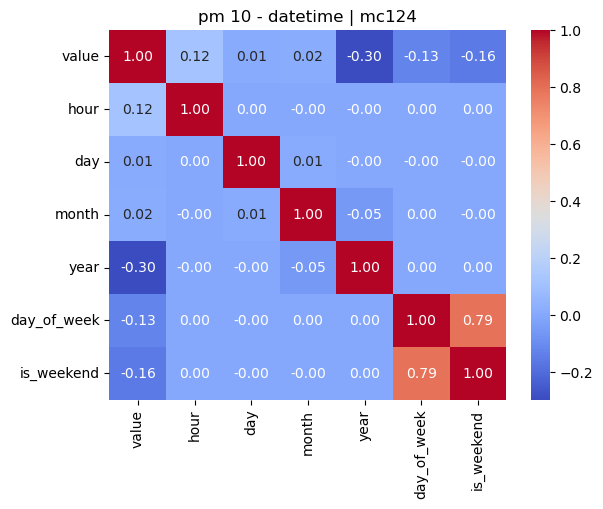

In [14]:
# show heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("pm 10 - datetime | mc124")
plt.show()

In [13]:
# Box-plot average Wert pro Wochentag